<a href="https://colab.research.google.com/github/s-srothh/computervision/blob/develop/ImageClassification/MNistDigitRecognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive 
from os.path import join
ROOT = "/content/drive"
print(ROOT)
drive.mount(ROOT)

/content/drive
Mounted at /content/drive


In [27]:
import tensorflow as tf
import tensorflow.keras.datasets as datasets
import numpy as np
import matplotlib.pyplot as plt

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [68]:
#Define set of parameters
BATCH_SIZE = 128
EPOCHS = 10
LR = 0.001
NUM_CLASSES = 10

In [43]:
#Load data
(x_train, y_train), (x_test, y_test) = datasets.mnist.load_data()
print(x_train.shape)

(60000, 28, 28)


In [44]:
#normalize input data from [0, 255] => [0, 1]
x_train, x_test = x_train / 255.0, x_test / 255.0

#transform ground truth to one-hot encoding
print(y_train.shape)
y_train, y_test = tf.one_hot(y_train, 10), tf.one_hot(y_test, 10)
print(y_train.shape)

(60000,)
(60000, 10)


In [45]:
# Separate train set into train and validation set
x_train, x_val, y_train, y_val = x_train[0:50000], x_train[50000:len(x_train)], y_train[0:50000], y_train[50000:len(y_train)]

print("Number of training instances: {0}".format(len(x_train)))
print("Number of training instances: {0}".format(len(x_val)))
print("Number of test instances: {0}".format(len(x_test)))

Number of training instances: 50000
Number of training instances: 10000
Number of test instances: 10000


Exception ignored in: <function IteratorResourceDeleter.__del__ at 0x7f3cd8665290>
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/tensorflow/python/data/ops/iterator_ops.py", line 546, in __del__
    handle=self._handle, deleter=self._deleter)
  File "/usr/local/lib/python3.7/dist-packages/tensorflow/python/ops/gen_dataset_ops.py", line 1264, in delete_iterator
    _ctx, "DeleteIterator", name, handle, deleter)
KeyboardInterrupt: 


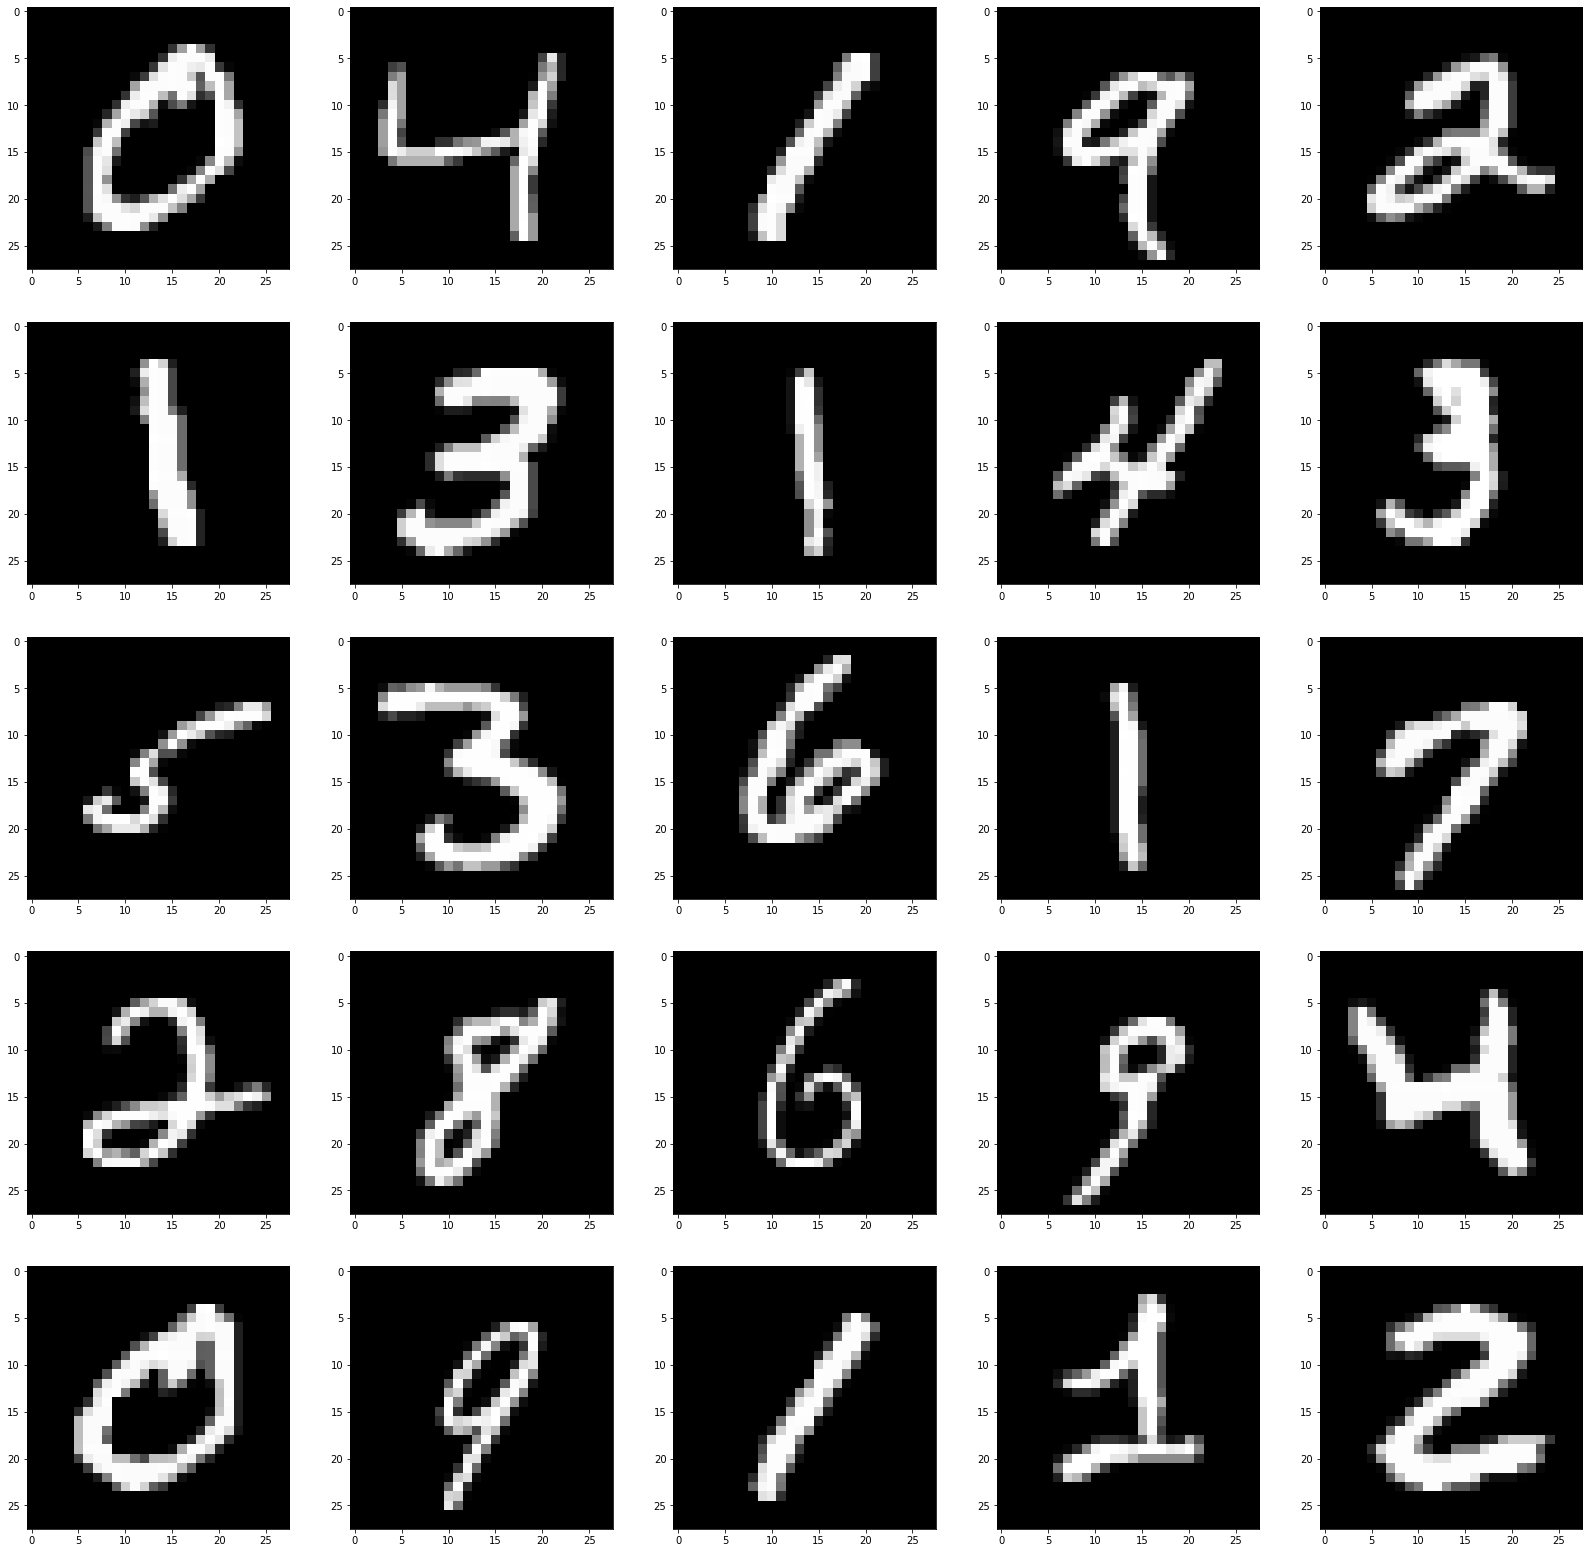

In [46]:
fig = plt.figure(figsize=(28, 28))
for i in range(1, 25 +1):
    img = x_train[i]
    fig.add_subplot(5, 5, i)
    plt.imshow(img, cmap='gray')

In [64]:
# extend input data by one dimension
x_train = np.reshape(x_train, (50000, 28, 28, 1))
x_val = np.reshape(x_val, (10000, 28, 28, 1))
x_test = np.reshape(x_test, (10000, 28, 28, 1))

In [48]:
train_ds, val_ds = (x_train, y_train), (x_val, y_val)

In [60]:
# Lets build the model 

def mnist_digit_recognizer():
    model = Sequential([
        layers.Conv2D(64, 7, padding='same', activation='relu', input_shape=(28, 28, 1)),
        layers.MaxPooling2D(),
        layers.Conv2D(128, 5, padding='same', activation='relu'),
        layers.MaxPooling2D(),
        layers.Conv2D(256, 3, padding='same', activation='relu'),
        layers.MaxPooling2D(),
        layers.Dropout(0.5),
        layers.Flatten(),
        layers.Dense(128, activation='relu'),
        layers.Dense(NUM_CLASSES, activation='softmax')
    ])

    return model

In [69]:
#Load and compile the model 
model = mnist_digit_recognizer()

optim = keras.optimizers.Adam(LR)

model.compile(optimizer=optim,
              loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [70]:
# Start the training of the model

history = model.fit(
    train_ds[0],
    train_ds[1],
    batch_size= BATCH_SIZE,
    shuffle=True,
    epochs=EPOCHS,
    validation_data= val_ds
)

Epoch 1/10


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/backend.py:4870: UserWarning: "`categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  '"`categorical_crossentropy` received `from_logits=True`, but '


391/391 [==============================] - 8s 17ms/step - loss: 0.2046 - accuracy: 0.9349 - val_loss: 0.0597 - val_accuracy: 0.9819
Epoch 2/10
391/391 [==============================] - 6s 16ms/step - loss: 0.0540 - accuracy: 0.9832 - val_loss: 0.0411 - val_accuracy: 0.9877
Epoch 3/10
391/391 [==============================] - 6s 16ms/step - loss: 0.0393 - accuracy: 0.9882 - val_loss: 0.0461 - val_accuracy: 0.9861
Epoch 4/10
391/391 [==============================] - 6s 16ms/step - loss: 0.0314 - accuracy: 0.9898 - val_loss: 0.0272 - val_accuracy: 0.9920
Epoch 5/10
391/391 [==============================] - 7s 17ms/step - loss: 0.0247 - accuracy: 0.9921 - val_loss: 0.0317 - val_accuracy: 0.9906
Epoch 6/10
391/391 [==============================] - 6s 16ms/step - loss: 0.0201 - accuracy: 0.9936 - val_loss: 0.0336 - val_accuracy: 0.9917
Epoch 7/10
391/391 [==============================] - 6s 16ms/step - loss: 0.0206 - accuracy: 0.9932 - val_loss: 0.0275 - val_accuracy: 0.9926
Epoch 8/10

In [71]:
print("Evaluate on test data")
results = model.evaluate(x_test, y_test, batch_size=BATCH_SIZE)
print("test loss, test acc:", results)

Evaluate on test data
79/79 [==============================] - 1s 7ms/step - loss: 0.0289 - accuracy: 0.9910
test loss, test acc: [0.028927642852067947, 0.9909999966621399]
